In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('college-data.csv')
df['founded_in'] = df['founded_in'].astype(int, errors='ignore')
df['founded_in'] = pd.to_datetime(df['founded_in'], format='%Y')
df['for_profit'] = df['for_profit'].astype(int)
# df['closed_merged_in'] = df['closed_merged_in'].astype(int, errors='ignore')
# df['closed_merged_in'] = pd.to_datetime(df['closed_merged_in'], format='%Y')

df.dtypes
# df['for_profit'] = df['for_profit'].astype(bool)
# df['religious_controlled'] = df['religious_controlled'].astype(bool)
# df.head(25)

name                            object
state                           object
location                        object
control                         object
for_profit                       int64
religious_controlled             int64
religious_orentation            object
degree_type                     object
focus                           object
founded_in              datetime64[ns]
closed_merged_in                object
done                            object
closed_reason                   object
enrollment                      object
historically_black              object
accreditation                   object
dtype: object

In [154]:
degree_types = ["Doctoral University", "Baccalaureate College", "Liberal Arts", "Masters University"]
degree_filter = df['degree_type'].isin(degree_types)

colleges = df[degree_filter]
# colleges.head(50)

In [4]:
# private_colleges = colleges[colleges['control'] == "Private"]
# private_colleges.head(25)
# non_profit_colleges = private_colleges[private_colleges['for_profit'] == 0]
# non_profit_colleges.head(25)
# secular_non_profit_colleges = non_profit_colleges[non_profit_colleges['religious_controlled'] == 0] 

secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]

secular_non_profit_colleges.head(5)
# secular_non_profit_colleges.dtypes

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [5]:
# Cast new dataframe with null values expunged for `founded_in` feature
try:
    snp_colleges_non_null = secular_non_profit_colleges.copy()
    snp_colleges_non_null["founded_in"].dropna(inplace=True)
    ARG_NON_NULL_FOUNDRY = snp_colleges_non_null["founded_in"].notnull()
    snp_colleges_non_null = snp_colleges_non_null[ARG_NON_NULL_FOUNDRY]
except:
    print("`Founded_In` null values are already dropped.")
    
snp_colleges_non_null.head()

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [6]:
snp_colleges_nn_time_series = (
        snp_colleges_non_null["founded_in"].value_counts()
        .rename_axis("Year")
        .reset_index(name="Count")
)

# Get Count Sums Per Decade
snp_colleges_nn_time_series = (
        snp_colleges_nn_time_series.groupby((snp_colleges_nn_time_series["Year"].dt.year // 10) * 10)
        .sum()
        .reset_index()
)

snp_colleges_nn_time_series

,Year,Count
0,1700,1
1,1740,4
2,1750,1
3,1760,2
4,1770,3
5,1780,7
6,1790,4
7,1800,2
8,1810,2
9,1820,9


In [36]:
MIN_YEAR, MAX_YEAR = 1690, 2030

[]

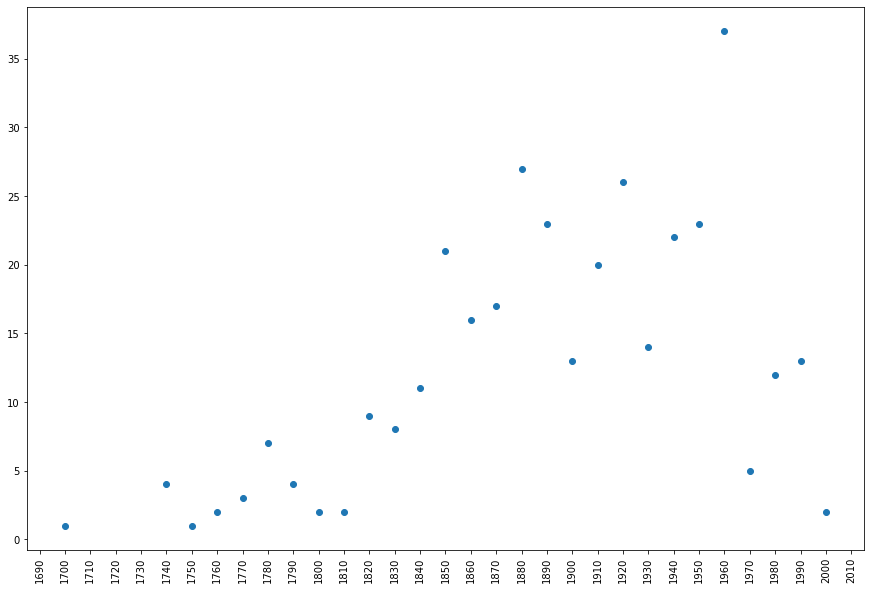

In [80]:
# Scatterplot
plt.figure(figsize=(15, 10))
plt.scatter(x=snp_colleges_nn_time_series["Year"],
            y=snp_colleges_nn_time_series["Count"])

plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.plot()

[]

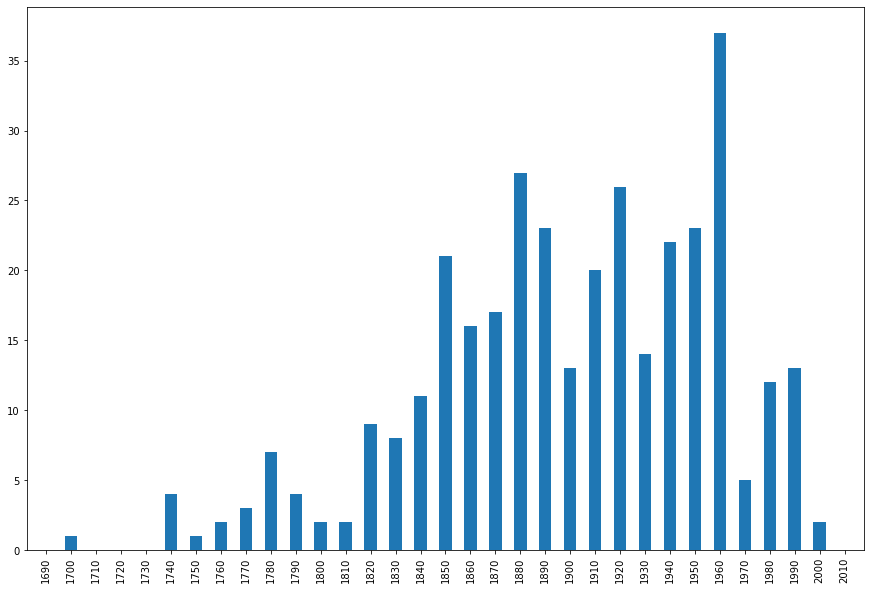

In [82]:
# Barplot
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.bar(x=snp_colleges_nn_time_series["Year"],
        height=snp_colleges_nn_time_series["Count"],
        width=5.)
plt.plot()

In [19]:
secular_non_profit_colleges["founded_in"].dt.year

1       1701.0
2       1740.0
3       1742.0
4       1746.0
5       1749.0
         ...  
2933    2008.0
2942    2009.0
2975       NaN
2976       NaN
2977       NaN
Name: founded_in, Length: 348, dtype: float64

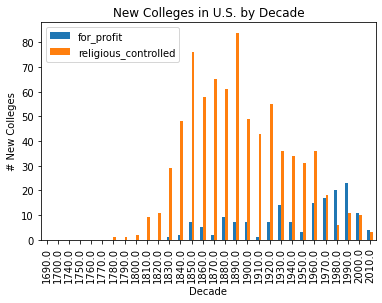

In [6]:
# Line chart of colleges founded by year
colleges_decades = colleges.groupby((colleges.founded_in.dt.year//10)*10).sum()
# print(decades)
colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

            for_profit  religious_controlled
founded_in                                  
1700.0               0                     0
1740.0               0                     0
1750.0               0                     0
1760.0               0                     0
1770.0               0                     0
1780.0               0                     0
1790.0               0                     0
1800.0               0                     0
1810.0               0                     0
1820.0               0                     0
1830.0               0                     0
1840.0               0                     0
1850.0               0                     0
1860.0               0                     0
1870.0               0                     0
1880.0               0                     0
1890.0               0                     0
1900.0               0                     0
1910.0               0                     0
1920.0               0                     0
1930.0    

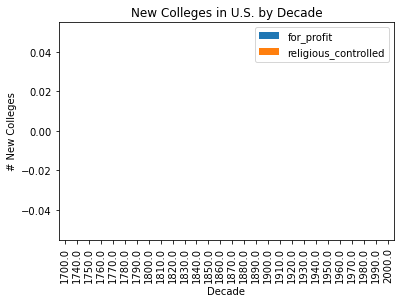

In [8]:
# Line chart of colleges founded by year
secular_non_profit_colleges_decades = secular_non_profit_colleges.groupby((secular_non_profit_colleges.founded_in.dt.year//10)*10).sum()
print(secular_non_profit_colleges_decades)
secular_non_profit_colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

### Below are the plots I'm working on,  haven't changed anything above //Johanna
1. All colleges founded by decade bar chart
2. Nonprofit, secular, bachelor’s degree granting colleges founded by decade bar chart
3. Comparison for profit, non profit colleges founded by decade.
4. Comparison religiously controlled, secular colleges founded by decade.

#### First, some processing and general setups
Questions: 
- Ok with empty bars for decades without any data? For example, 1710, 1720, 1730.
- Font and figure sizes 
- Colors or bars

Colleges with NaT in founded_in column: 
- Mount Liberty College (2019?)
- New U Univeresity (2019?) 
- University of Beverly Hills (still exist?)
- San Ignacio University (Doral) (?)
- Valley Forge Christian College (1939?)
- Washington Baptist University (1982?)

In [155]:
# 6 colleges have NaT in founded_in column, remove these for now - could be added manually though
colleges = colleges[~colleges["founded_in"].isnull()]

In [156]:
# Make a decade column and print some checks
colleges["decade"] = np.floor(colleges["founded_in"].dt.year/10)*10
colleges["decade"] = colleges["decade"].astype(int)
n_decades = len(colleges["decade"].unique())
min_decade = np.min(colleges["decade"].unique())
max_decade = np.max(colleges["decade"].unique())
print(f"Decades in data: {colleges.decade.unique()}")
print(f"Decade span: {min_decade} - {max_decade}")
colleges.head(5)

Decades in data: [1690 1700 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850
 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990
 2000 2010]
Decade span: 1690 - 2010


,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation,decade
0,College of William and Mary,Virginia,Williamsburg,Public,0,0,NaN,Doctoral University,NaN,1693-01-01,NaN,NaN,NaN,"8,817",NaN,SACS,1690
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN,1700
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN,1740
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN,1740
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE,1740


In [157]:
# General plotting setups
fig_size = (15, 10)
x_range = np.arange(min_decade, max_decade + 10, step=10)
bin_range = (min_decade-5, max_decade + 5)

#### 1, All colleges founded by decade bar chart

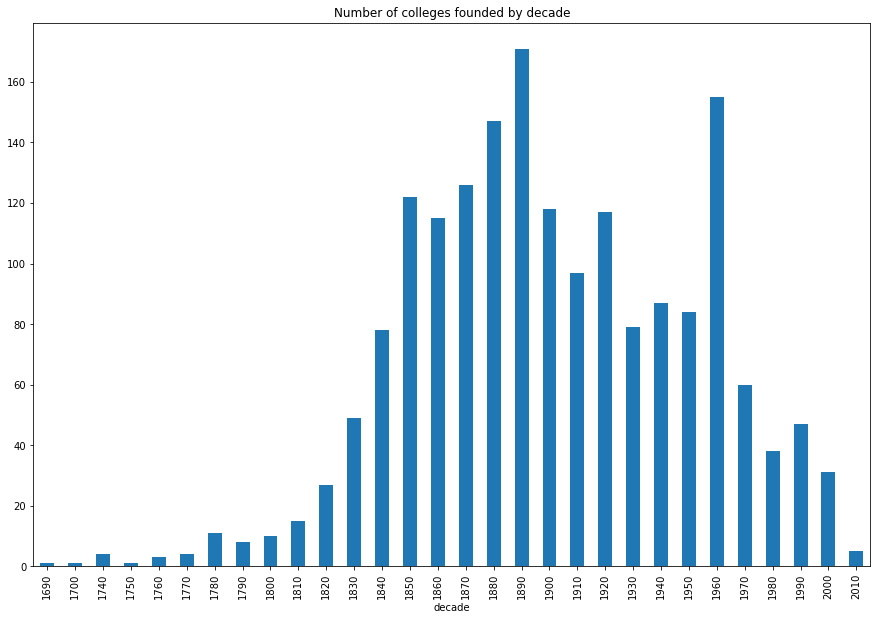

In [133]:
# matplotlib barplot - obs decades without data are missing in this plot
plt.figure(figsize=fig_size)
colleges.groupby(colleges["decade"])["name"].count().plot(kind='bar')
# plt.ylabel("Count")
plt.title("Number of colleges founded by decade");

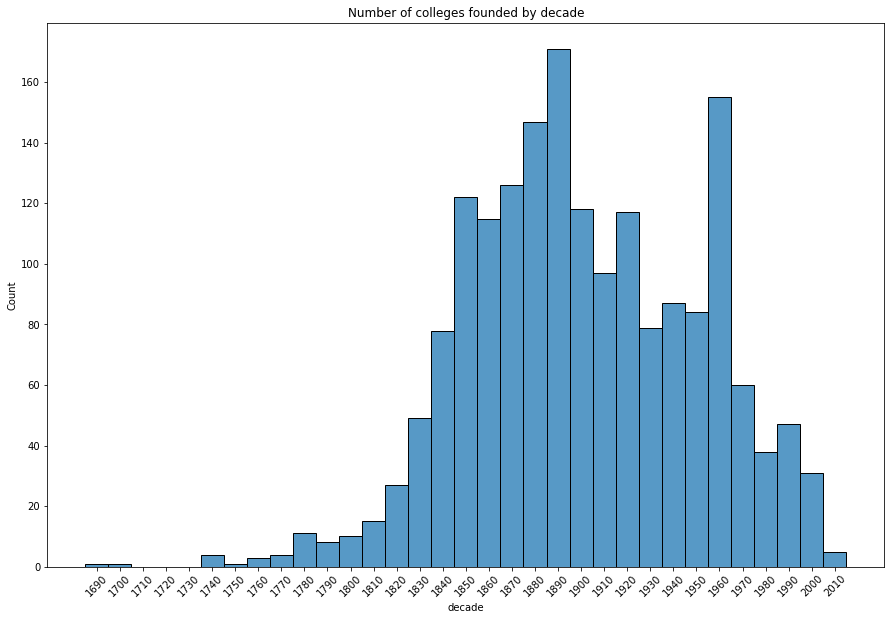

In [161]:
# seaborn histogram
plt.figure(figsize=fig_size)
plt.xticks(x_range, rotation=45)
sns.histplot(data=colleges, x="decade", binwidth=10, binrange=bin_range)
plt.title("Number of colleges founded by decade");
# plt.savefig("plots/plot_1.png", facecolor='white')  # ignore facecolor for a transparent background

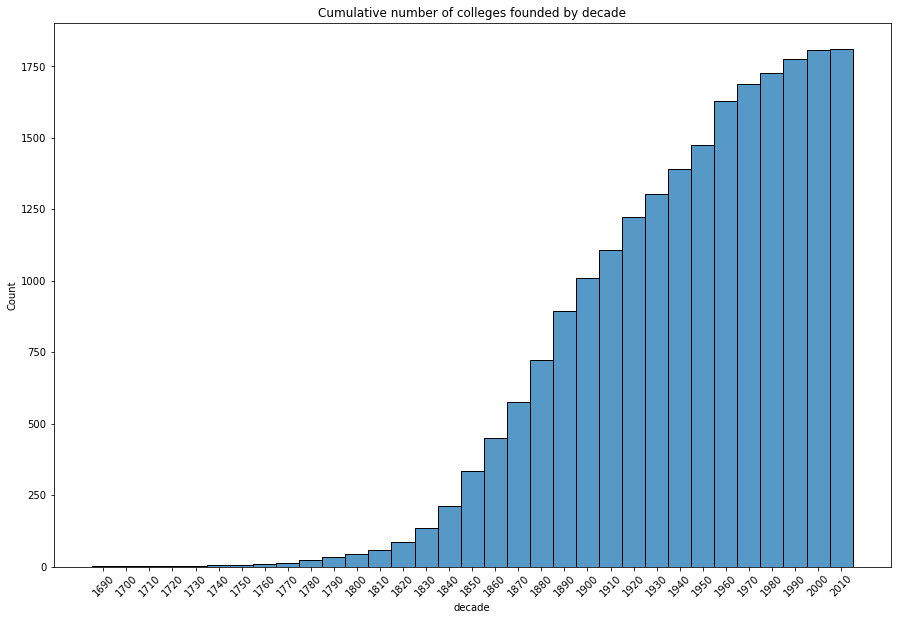

In [130]:
# seaborn cumulative histogram (just for fun)
plt.figure(figsize=fig_size)
plt.xticks(x_range, rotation=45)
sns.histplot(data=colleges, x="decade", binwidth=10, binrange=bin_range, cumulative=True)
plt.title("Cumulative number of colleges founded by decade");

#### 2, Nonprofit, secular, bachelor’s degree granting colleges founded by decade bar chart

In [158]:
# Same as given code above
secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]
secular_non_profit_colleges.head(5)

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation,decade
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN,1700
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN,1740
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN,1740
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE,1740
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS,1740


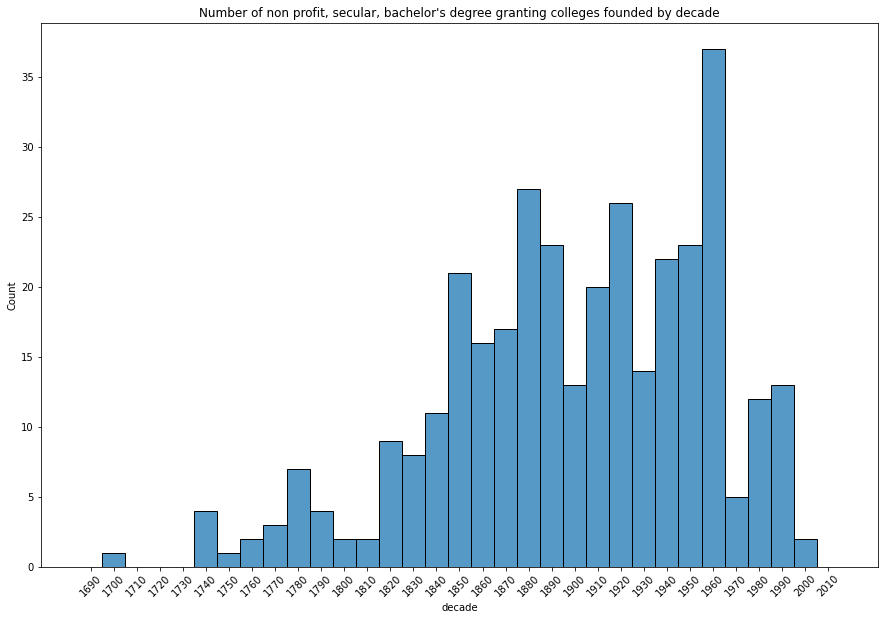

In [162]:
plt.figure(figsize=fig_size)
plt.xticks(x_range, rotation=45)
sns.histplot(data=secular_non_profit_colleges, x="decade", binwidth=10, binrange=bin_range)
plt.title("Number of non profit, secular, bachelor's degree granting colleges founded by decade");
# plt.savefig("plots/plot_2.png", facecolor='white')  # ignore facecolor for a transparent background

#### 3. Comparison for profit, non profit colleges founded by decade.

todo: update legend to look nicer than just for_profit 0 or 1 (top right in plot)

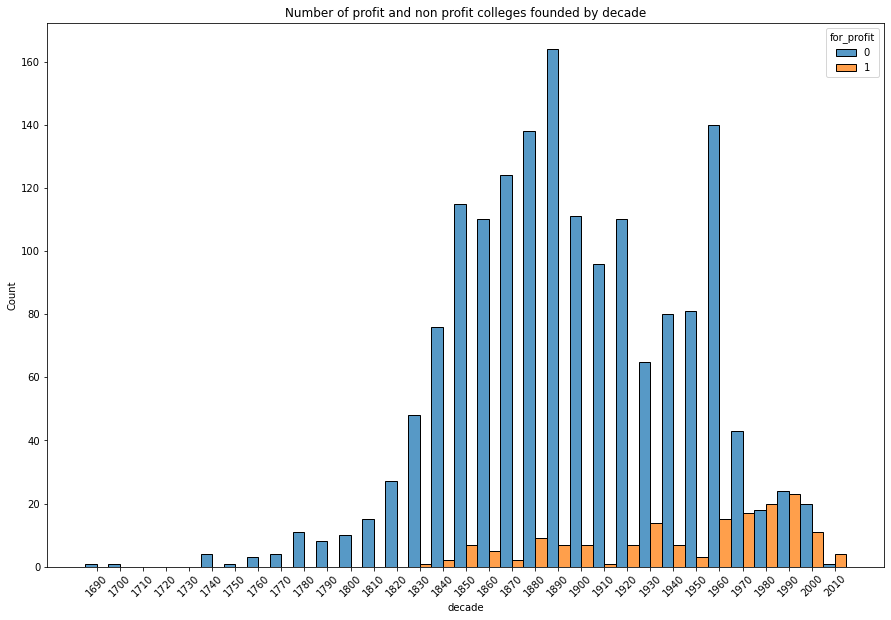

In [168]:
plt.figure(figsize=fig_size)
plt.xticks(x_range, rotation=45)
sns.histplot(data=colleges, x="decade", hue="for_profit", multiple="dodge", binwidth=10, binrange=bin_range)
plt.title("Number of profit and non profit colleges founded by decade");
# plt.savefig("plots/plot_3.png", facecolor='white')  # ignore facecolor for a transparent background

#### 4. Comparison religiously controlled, secular colleges founded by decade.

todo: update legend to look better than just religious_controlled 0 or 1 (top right in plot)

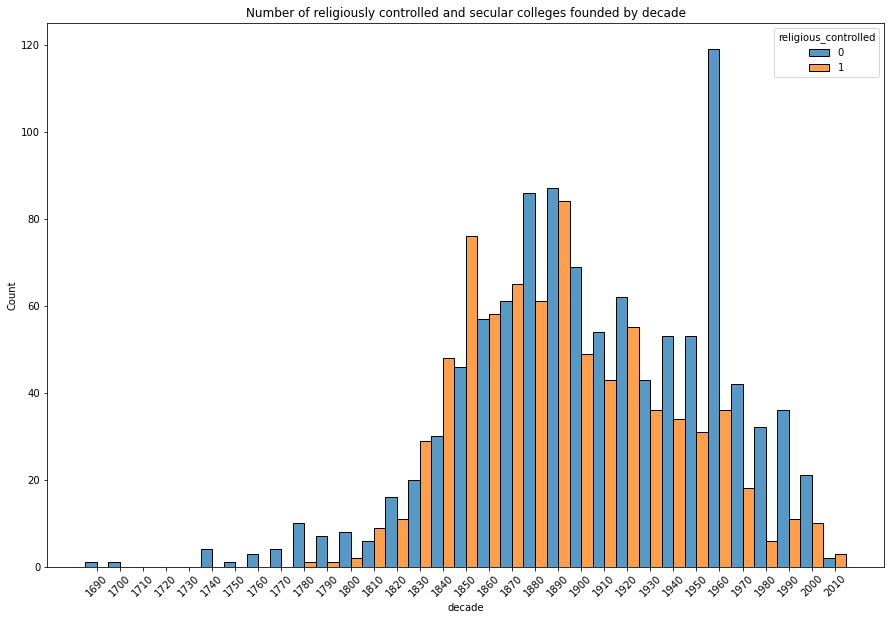

In [169]:
plt.figure(figsize=fig_size)
plt.xticks(x_range, rotation=45)
sns.histplot(data=colleges, x="decade", hue="religious_controlled", multiple="dodge", binwidth=10, binrange=bin_range)
plt.title("Number of religiously controlled and secular colleges founded by decade");
# plt.savefig("plots/plot_4.png", facecolor='white')  # ignore facecolor for a transparent background